# Exercise 4

In [3]:
def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
        for i in range(len(data) - 1):
            if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data

In [4]:
def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
        # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                    # nothing remains on the left; add the right + return
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
                    # nothing remains on the right; add the left + return
                    return result + [left_top] + list(left)

## A few tests

In [21]:
test_list = [2, 2, 7, 5]
alg1(test_list)

[2, 2, 5, 7]

In [20]:
test_list = [2, 2, 7, 5]
alg2(test_list)

[2, 2, 5, 7]

In [16]:
test_list = [8, 3, 13, 6, 2, 14, 5, 9, 10]
alg1(test_list)

[2, 3, 5, 6, 8, 9, 10, 13, 14]

In [17]:
test_list = [8, 3, 13, 6, 2, 14, 5, 9, 10]
alg2(test_list)

[2, 3, 5, 6, 8, 9, 10, 13, 14]

In [24]:
import random
test_list = [random.randint(0,1000) for i in range(100)]

In [27]:
print(alg1(test_list))

[3, 8, 10, 33, 51, 63, 65, 65, 73, 77, 97, 119, 120, 124, 127, 128, 168, 193, 204, 229, 233, 250, 255, 272, 278, 312, 338, 344, 354, 368, 380, 382, 408, 409, 410, 411, 422, 448, 452, 460, 468, 474, 484, 486, 492, 501, 538, 541, 547, 552, 572, 586, 607, 610, 618, 644, 650, 666, 680, 684, 687, 692, 698, 701, 708, 718, 725, 729, 734, 740, 761, 765, 786, 787, 796, 809, 814, 833, 848, 849, 853, 868, 868, 875, 877, 880, 881, 889, 891, 893, 894, 900, 900, 905, 907, 929, 931, 955, 985, 992]


In [28]:
print(alg2(test_list))

[3, 8, 10, 33, 51, 63, 65, 65, 73, 77, 97, 119, 120, 124, 127, 128, 168, 193, 204, 229, 233, 250, 255, 272, 278, 312, 338, 344, 354, 368, 380, 382, 408, 409, 410, 411, 422, 448, 452, 460, 468, 474, 484, 486, 492, 501, 538, 541, 547, 552, 572, 586, 607, 610, 618, 644, 650, 666, 680, 684, 687, 692, 698, 701, 708, 718, 725, 729, 734, 740, 761, 765, 786, 787, 796, 809, 814, 833, 848, 849, 853, 868, 868, 875, 877, 880, 881, 889, 891, 893, 894, 900, 900, 905, 907, 929, 931, 955, 985, 992]


## Time the performance

In [2]:
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

def data2(n):
    return list(range(n))

def data3(n):
    return list(range(n, 0, -1))

100%|██████████| 50/50 [01:06<00:00,  1.32s/it] 


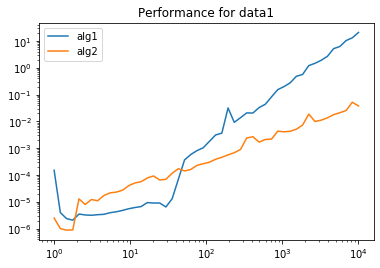

In [6]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from tqdm import tqdm
timelist_alg1 = []
timelist_alg2 = []
sizes = np.logspace(0, 4)
for n in tqdm(sizes):
    n = int(n)
    X_test = data1(n)
    start = perf_counter()
    alg1(X_test)
    end = perf_counter()
    timelist_alg1.append(end-start)
    
    X_test = data1(n)
    start = perf_counter()
    alg2(X_test)
    end = perf_counter()
    timelist_alg2.append(end-start)

plt.loglog(sizes, timelist_alg1, label='alg1')
plt.loglog(sizes, timelist_alg2, label='alg2')
plt.title('Performance for data1')
plt.legend()
plt.savefig("README_img/EX4_2.png")
plt.show()

100%|██████████| 50/50 [00:00<00:00, 191.66it/s]


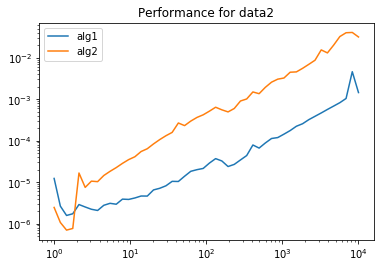

In [7]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from tqdm import tqdm
timelist_alg1 = []
timelist_alg2 = []
sizes = np.logspace(0, 4)
for n in tqdm(sizes):
    n = int(n)
    X_test = data2(n)
    start = perf_counter()
    alg1(X_test)
    end = perf_counter()
    timelist_alg1.append(end-start)
    
    X_test = data2(n)
    start = perf_counter()
    alg2(X_test)
    end = perf_counter()
    timelist_alg2.append(end-start)

plt.loglog(sizes, timelist_alg1, label='alg1')
plt.loglog(sizes, timelist_alg2, label='alg2')
plt.title('Performance for data2')
plt.legend()
plt.savefig("README_img/EX4_3.png")
plt.show()

100%|██████████| 50/50 [01:23<00:00,  1.67s/it] 


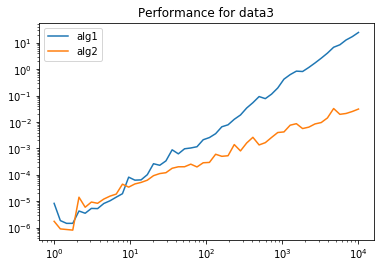

In [8]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from tqdm import tqdm
timelist_alg1 = []
timelist_alg2 = []
sizes = np.logspace(0, 4)
for n in tqdm(sizes):
    n = int(n)
    X_test = data3(n)
    start = perf_counter()
    alg1(X_test)
    end = perf_counter()
    timelist_alg1.append(end-start)
    
    X_test = data3(n)
    start = perf_counter()
    alg2(X_test)
    end = perf_counter()
    timelist_alg2.append(end-start)

plt.loglog(sizes, timelist_alg1, label='alg1')
plt.loglog(sizes, timelist_alg2, label='alg2')
plt.title('Performance for data3')
plt.legend()
plt.savefig("README_img/EX4_4.png")
plt.show()

100%|██████████| 50/50 [02:28<00:00,  2.97s/it] 


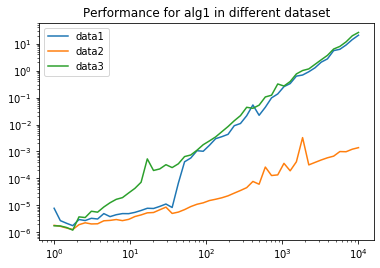

In [9]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from tqdm import tqdm
timelist_data1 = []
timelist_data2 = []
timelist_data3 = []
sizes = np.logspace(0, 4)
for n in tqdm(sizes):
    n = int(n)
    X_test = data1(n)
    start = perf_counter()
    alg1(X_test)
    end = perf_counter()
    timelist_data1.append(end-start)
    
    n = int(n)
    X_test = data2(n)
    start = perf_counter()
    alg1(X_test)
    end = perf_counter()
    timelist_data2.append(end-start)
    
    X_test = data3(n)
    start = perf_counter()
    alg1(X_test)
    end = perf_counter()
    timelist_data3.append(end-start)

plt.loglog(sizes, timelist_data1, label='data1')
plt.loglog(sizes, timelist_data2, label='data2')
plt.loglog(sizes, timelist_data3, label='data3')
plt.title('Performance for alg1 in different dataset')
plt.legend()
plt.savefig("README_img/EX4_5.png")
plt.show()

100%|██████████| 50/50 [00:01<00:00, 43.29it/s] 


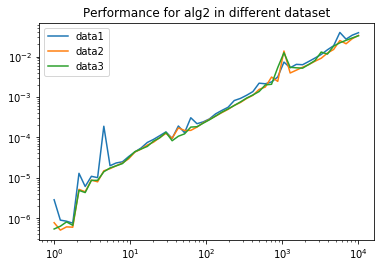

In [10]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from tqdm import tqdm
timelist_data1 = []
timelist_data2 = []
timelist_data3 = []
sizes = np.logspace(0, 4)
for n in tqdm(sizes):
    n = int(n)
    X_test = data1(n)
    start = perf_counter()
    alg2(X_test)
    end = perf_counter()
    timelist_data1.append(end-start)
    
    n = int(n)
    X_test = data2(n)
    start = perf_counter()
    alg2(X_test)
    end = perf_counter()
    timelist_data2.append(end-start)
    
    X_test = data3(n)
    start = perf_counter()
    alg2(X_test)
    end = perf_counter()
    timelist_data3.append(end-start)

plt.loglog(sizes, timelist_data1, label='data1')
plt.loglog(sizes, timelist_data2, label='data2')
plt.loglog(sizes, timelist_data3, label='data3')
plt.title('Performance for alg2 in different dataset')
plt.legend()
plt.savefig("README_img/EX4_6.png")
plt.show()